In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('data/combined_subsets.csv')

In [2]:
import imblearn
from imblearn.over_sampling import SMOTE
print(imblearn.__version__)

0.7.0


In [3]:
from collections import Counter

# Initial Model: Only Drop NULL

In [4]:
stroke_data_df = data.dropna()
stroke_data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,0,228.69,36.6,1,1
1,31112,1,80.0,0,1,1,0,1,105.92,32.5,0,1
2,60182,0,49.0,0,0,1,0,0,171.23,34.4,2,1
3,1665,0,79.0,1,0,1,1,1,174.12,24.0,0,1
4,56669,1,81.0,0,0,1,0,0,186.21,29.0,1,1


In [14]:
Positive = stroke_data_df[stroke_data_df['stroke'] == 1]
len(Positive)

548

In [15]:
Negative = stroke_data_df[stroke_data_df['stroke'] == 0]
len(Negative)

28524

In [5]:
# set y as the 'stroke' output, with targets of 0 (No) and 1 (Yes)
y = stroke_data_df['stroke']
target_names = ['0', '1']

# set X as the df after dropping stroke output and id
X = stroke_data_df.drop('stroke', axis=1).drop('id',axis=1)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.965
k: 3, Train/Test Score: 0.982/0.979
k: 5, Train/Test Score: 0.981/0.981
k: 7, Train/Test Score: 0.981/0.981
k: 9, Train/Test Score: 0.981/0.981
k: 11, Train/Test Score: 0.981/0.981
k: 13, Train/Test Score: 0.981/0.981
k: 15, Train/Test Score: 0.981/0.981
k: 17, Train/Test Score: 0.981/0.981
k: 19, Train/Test Score: 0.981/0.981
k: 21, Train/Test Score: 0.981/0.981
k: 23, Train/Test Score: 0.981/0.981
k: 25, Train/Test Score: 0.981/0.981
k: 27, Train/Test Score: 0.981/0.981
k: 29, Train/Test Score: 0.981/0.981
k: 31, Train/Test Score: 0.981/0.981
k: 33, Train/Test Score: 0.981/0.981
k: 35, Train/Test Score: 0.981/0.981
k: 37, Train/Test Score: 0.981/0.981
k: 39, Train/Test Score: 0.981/0.981


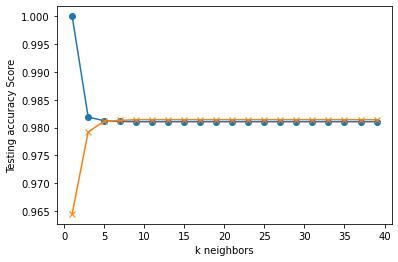

In [12]:
# Loop through different k values to see which has the highest accuracy
train_scores1 = []
test_scores1 = []
for k in range(1, 40, 2):
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn1.fit(X_train, y_train)
    train_score = knn1.score(X_train, y_train)
    test_score = knn1.score(X_test, y_test)
    train_scores1.append(train_score)
    test_scores1.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot score results for training and test sets for each k=N    
plt.plot(range(1, 40, 2), train_scores1, marker='o')
plt.plot(range(1, 40, 2), test_scores1, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [16]:
# Calculate classification report
from sklearn.metrics import classification_report

predictions = knn1.predict(X_test)

print(classification_report(y_test, predictions,
                            target_names=["No Stroke", "Stroke"]))

              precision    recall  f1-score   support

   No Stroke       0.98      1.00      0.99      7133
      Stroke       0.00      0.00      0.00       135

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.96      0.98      0.97      7268



C:\Users\vmdin\anaconda3\envs\PythonML\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Modified Data: Even Stroke vs No Stroke Outcomes

In [17]:
# Create separate df for records that have stroke and have no stroke
stroke_positive = stroke_data_df[stroke_data_df['stroke'] == 1]
stroke_negative = stroke_data_df[stroke_data_df['stroke'] == 0]

# return random sample of 500 for both postive and negative results
stroke_negative_sample = stroke_negative.sample(500)
stroke_positive_sample = stroke_positive.sample(500)

# merge postive and negative df to make one combined df
stroke_sample = pd.merge(stroke_negative_sample, stroke_positive_sample, how = 'outer')

stroke_sample.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,13706,1,47.0,0,0,1,3,1,86.47,24.0,0,0
1,71848,0,78.0,0,0,1,1,0,143.04,28.4,0,0
2,18047,1,81.0,0,0,1,1,0,72.98,22.3,1,0
3,38429,1,56.0,0,0,0,0,1,110.04,24.0,0,0
4,60354,0,15.0,0,0,0,2,0,150.58,24.6,0,0


In [18]:
# set y as the 'stroke' output, with targets of 0 (No) and 1 (Yes)
y = stroke_sample['stroke']
target_names = ['0', '1']

# set X as the df after dropping stroke output and id
X = stroke_sample.drop('stroke', axis=1).drop('id',axis=1)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.632
k: 3, Train/Test Score: 0.831/0.696
k: 5, Train/Test Score: 0.815/0.708
k: 7, Train/Test Score: 0.797/0.720
k: 9, Train/Test Score: 0.785/0.712
k: 11, Train/Test Score: 0.772/0.708
k: 13, Train/Test Score: 0.768/0.712
k: 15, Train/Test Score: 0.773/0.724
k: 17, Train/Test Score: 0.775/0.724
k: 19, Train/Test Score: 0.773/0.704
k: 21, Train/Test Score: 0.767/0.720
k: 23, Train/Test Score: 0.763/0.732
k: 25, Train/Test Score: 0.753/0.728
k: 27, Train/Test Score: 0.753/0.736
k: 29, Train/Test Score: 0.756/0.744
k: 31, Train/Test Score: 0.761/0.724
k: 33, Train/Test Score: 0.760/0.720
k: 35, Train/Test Score: 0.763/0.716
k: 37, Train/Test Score: 0.769/0.720
k: 39, Train/Test Score: 0.769/0.712


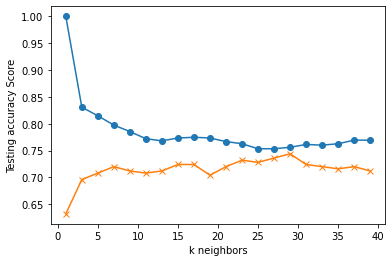

In [22]:
# Loop through different k values to see which has the highest accuracy
train_scores2 = []
test_scores2 = []
for k in range(1, 40, 2):
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X_train, y_train)
    train_score = knn2.score(X_train, y_train)
    test_score = knn2.score(X_test, y_test)
    train_scores2.append(train_score)
    test_scores2.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot score results for training and test sets for each k=N    
plt.plot(range(1, 40, 2), train_scores2, marker='o')
plt.plot(range(1, 40, 2), test_scores2, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [23]:
# Calculate classification report
from sklearn.metrics import classification_report

predictions = knn2.predict(X_test)

print(classification_report(y_test, predictions,
                            target_names=["No Stroke", "Stroke"]))

              precision    recall  f1-score   support

   No Stroke       0.76      0.61      0.67       122
      Stroke       0.68      0.81      0.74       128

    accuracy                           0.71       250
   macro avg       0.72      0.71      0.71       250
weighted avg       0.72      0.71      0.71       250



# SMOTE Trained: Augment Data with additional Stroke Outcomes

In [24]:
# set y as the 'stroke' output, with targets of 0 (No) and 1 (Yes)
y = stroke_data_df['stroke']
target_names = ['0', '1']

# set X as the df after dropping stroke output and id
X = stroke_data_df.drop('stroke', axis=1).drop('id',axis=1)

# define a smote instance with default parameters
oversample = SMOTE()

# rebalance data by applying SMOTE to add instances of 'Yes'
X, y = oversample.fit_resample(X, y)

# show new counts of output variables by type (should be same)
counter = Counter(y)
print(counter)

Counter({1: 28524, 0: 28524})


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.948
k: 3, Train/Test Score: 0.955/0.928
k: 5, Train/Test Score: 0.935/0.915
k: 7, Train/Test Score: 0.922/0.905
k: 9, Train/Test Score: 0.913/0.900
k: 11, Train/Test Score: 0.905/0.895
k: 13, Train/Test Score: 0.899/0.890
k: 15, Train/Test Score: 0.893/0.886
k: 17, Train/Test Score: 0.889/0.882
k: 19, Train/Test Score: 0.885/0.878
k: 21, Train/Test Score: 0.881/0.875
k: 23, Train/Test Score: 0.877/0.871
k: 25, Train/Test Score: 0.874/0.867
k: 27, Train/Test Score: 0.872/0.865
k: 29, Train/Test Score: 0.868/0.863
k: 31, Train/Test Score: 0.866/0.861
k: 33, Train/Test Score: 0.864/0.859
k: 35, Train/Test Score: 0.861/0.856
k: 37, Train/Test Score: 0.859/0.854
k: 39, Train/Test Score: 0.857/0.853


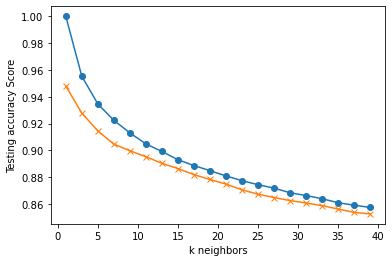

In [26]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot score results for training and test sets for each k=N    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [27]:
# Print test score for best k
# k: 5 appears to be best (scores plateau at 5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('k=5 Train Acc: %.3f' % knn.score(X_train, y_train))
print('k=5 Test Acc: %.3f' % knn.score(X_test, y_test))

k=5 Train Acc: 0.935
k=5 Test Acc: 0.915


In [28]:
# Calculate classification report
from sklearn.metrics import classification_report

predictions = knn.predict(X_test)

print(classification_report(y_test, predictions,
                            target_names=["No Stroke", "Stroke"]))

              precision    recall  f1-score   support

   No Stroke       0.99      0.84      0.91      7075
      Stroke       0.86      0.99      0.92      7187

    accuracy                           0.91     14262
   macro avg       0.92      0.91      0.91     14262
weighted avg       0.92      0.91      0.91     14262



## Use cell below to make predictions with KNN model

### List of input values in order (with codification)
 - Gender (Female=0,Male=1,Other=2)
 - Age (actual value)
 - Hypertension (No=0,Yes=1)
 - Heart Diserase (No=0,Yes=1)
 - Married (No=0,Yes=1)
 - Work Type (Private=0,Self-employed=1,children=2,Govt_job=3,Never_worked=4")
 - Residence Type (Urban=0,Rural=1)
 - Blood Glucose Level (actual value)
 - BMI (actual value)
 - Smoking (never smoked=0,formerly smoked=1,smokes=2,unkown=3)

### Output prediction value
 - Have you had a Stroke? (No=0,Yes=1)

In [ ]:
sample = [[1,27,0,0,0,0,0,100,29,1]]
prediction = knn.predict(sample)
print(prediction)

## Save Model to File

In [ ]:
import joblib

In [ ]:
filename = 'knn_model.sav'

#dump model to file
joblib.dump(knn, filename)

In [ ]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(sample)
print(result)